### Housing Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('./Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [74]:
df=data.iloc[:,:2]
df.head()

,price,area
15,9100000.0,6000
16,9100000.0,6600
17,8960000.0,8500
18,8890000.0,4600
19,8855000.0,6420


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.shape

(545, 13)

In [75]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,530.0,4.600663e+06,1.596119e+06,1750000.0,3430000.0,4270000.0,5600000.00,9100000.0
area,530.0,5.061519e+03,2.075449e+03,1650.0,3547.5,4500.0,6315.75,15600.0


In [76]:
df.isnull().mean()*100

price    0.0
area     0.0
dtype: float64

In [7]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

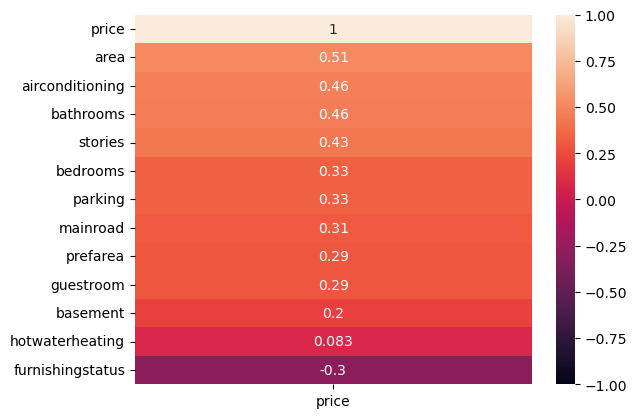

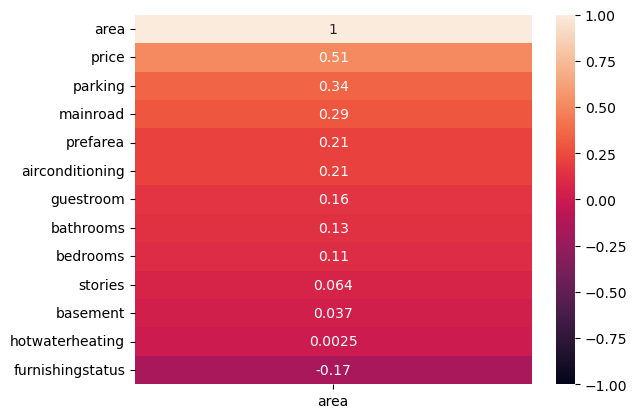

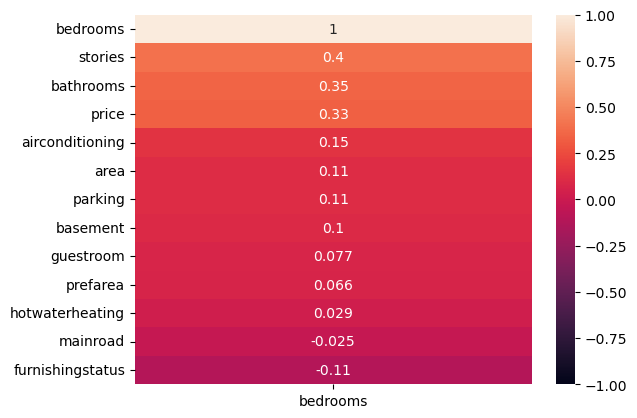

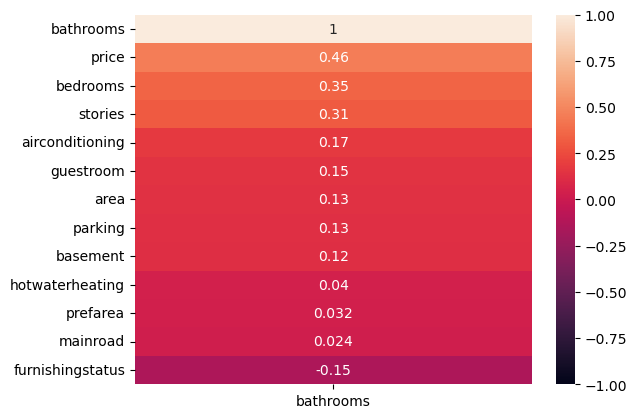

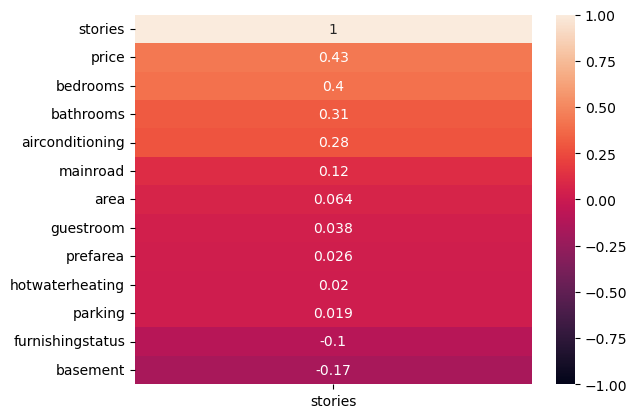

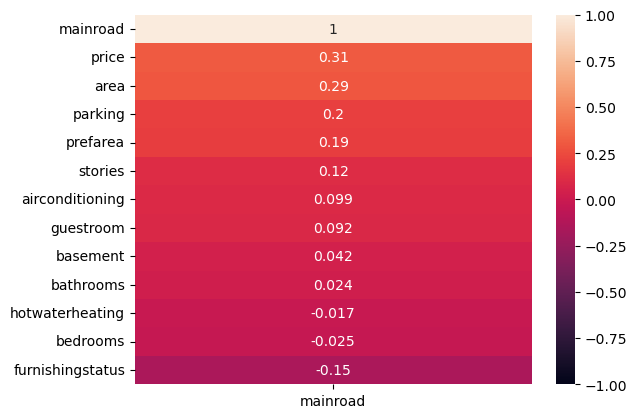

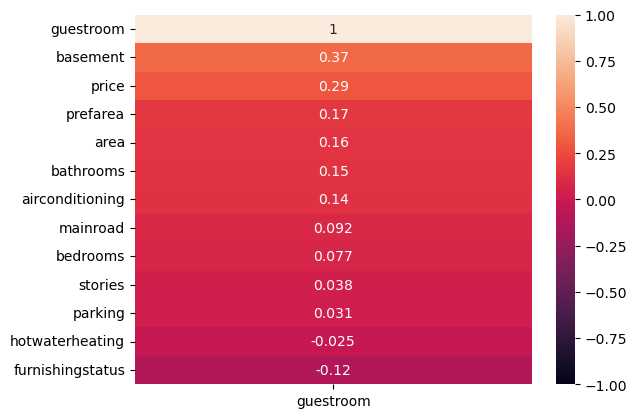

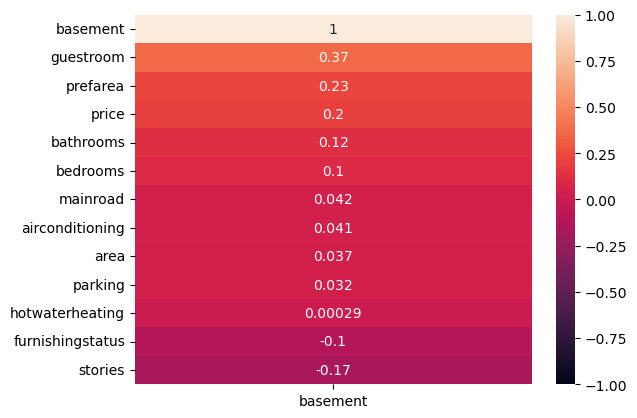

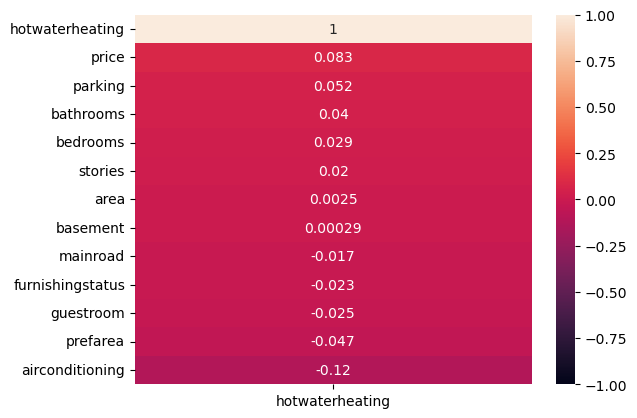

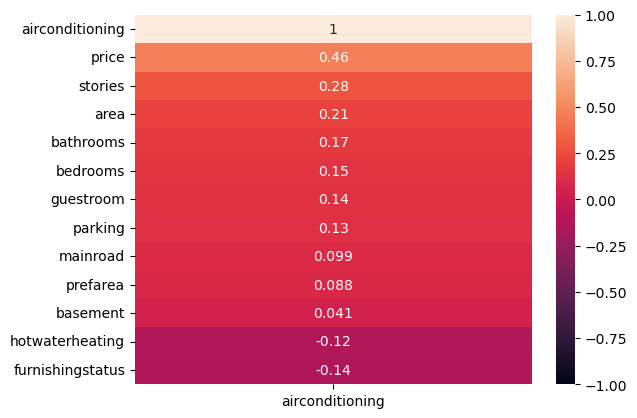

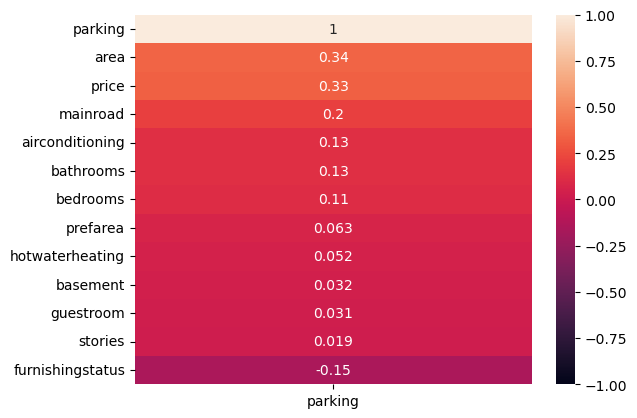

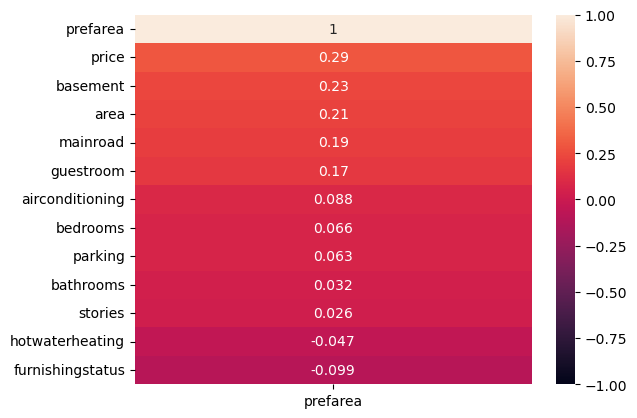

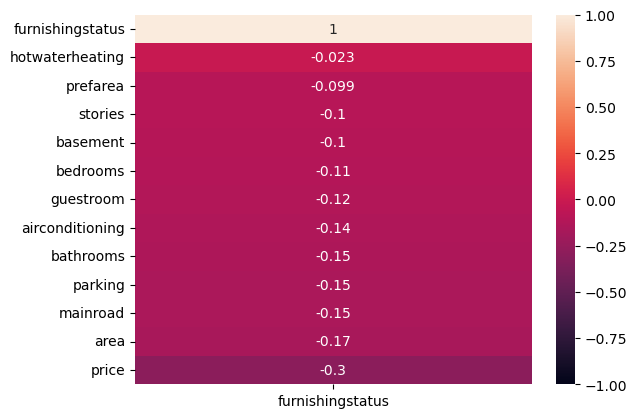

In [73]:
for i in data.columns:
    sns.heatmap(data.corr()[[i]].sort_values(by=i, ascending=False), vmin=-1, vmax=1, annot=True)
    plt.show()

#### Univariate Analysis

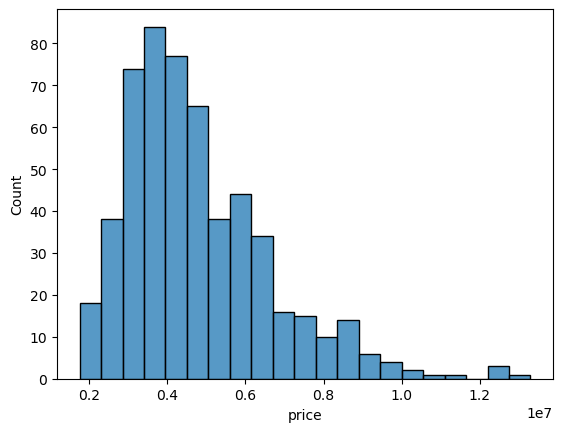

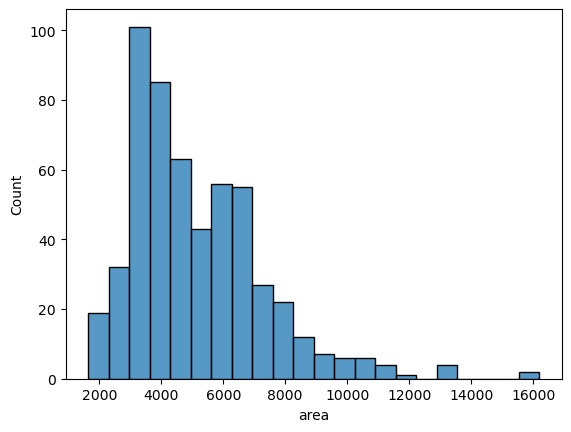

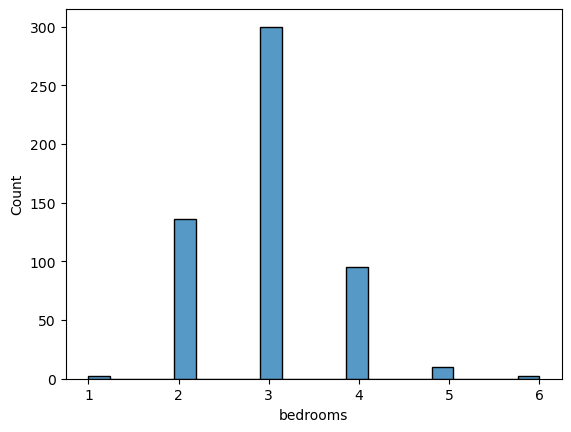

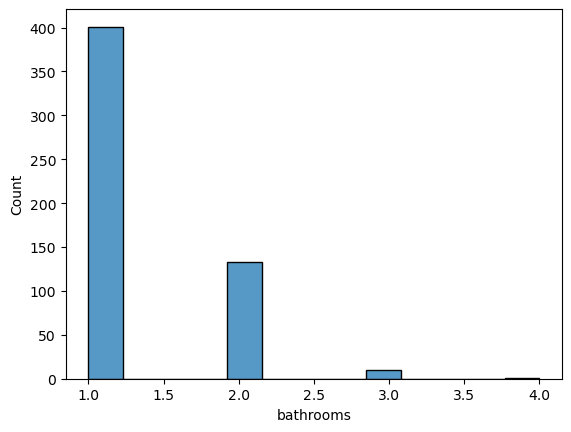

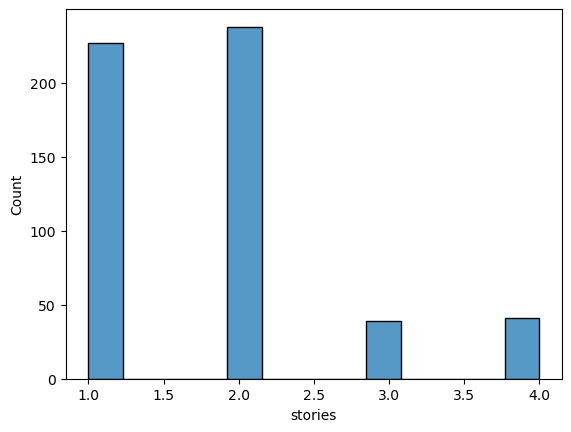

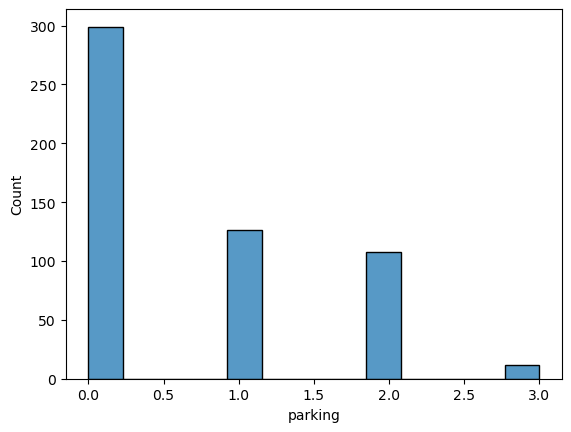

In [8]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.histplot(x = data[i] )
        plt.show()

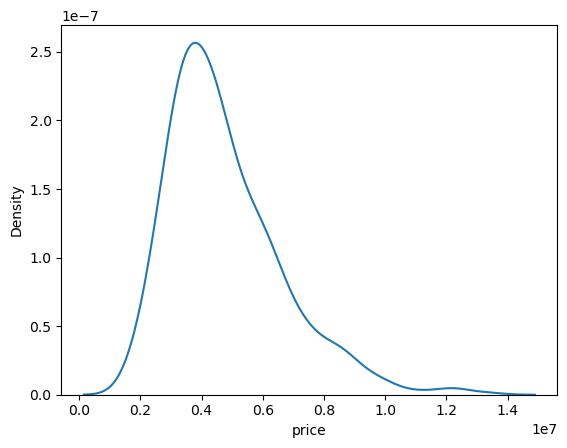

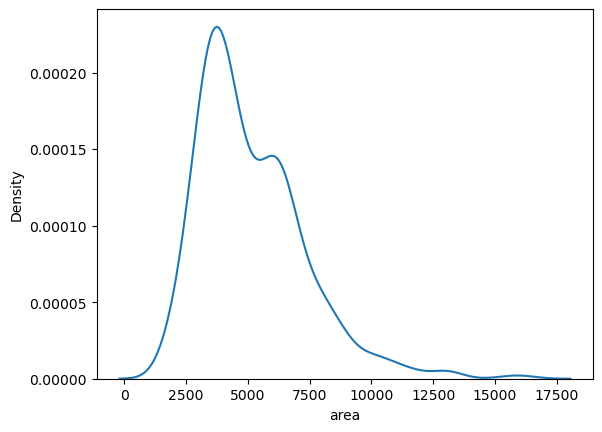

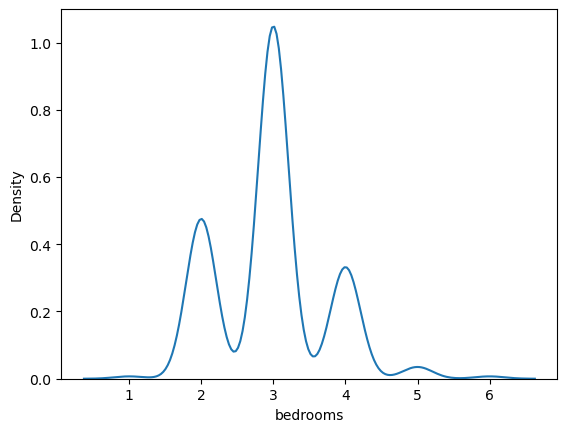

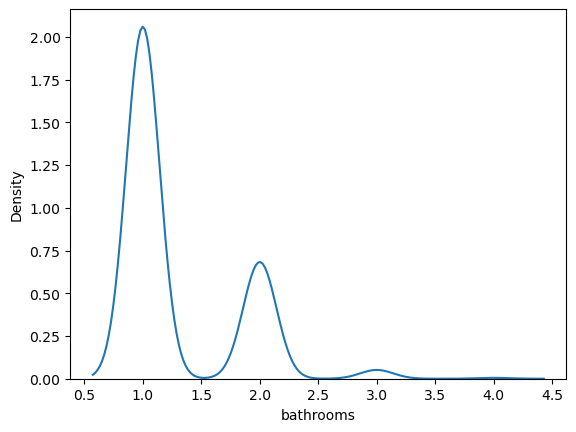

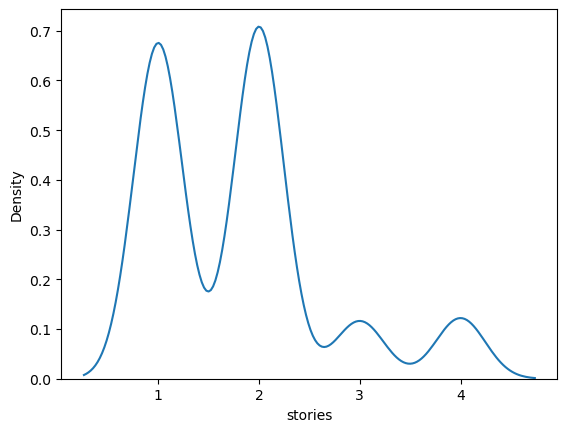

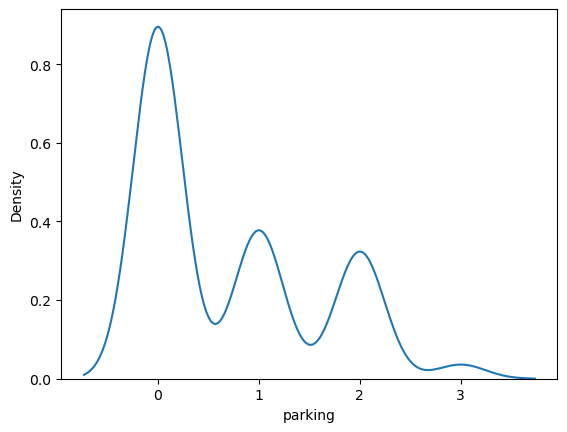

In [9]:
for i in data.columns:
    if data[i].dtypes != "object":
        sns.kdeplot(x = data[i] )
        plt.show()

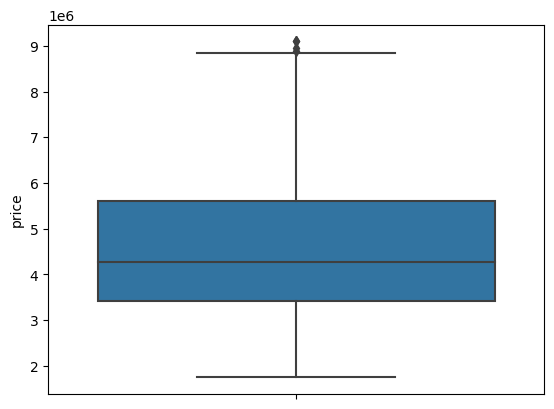

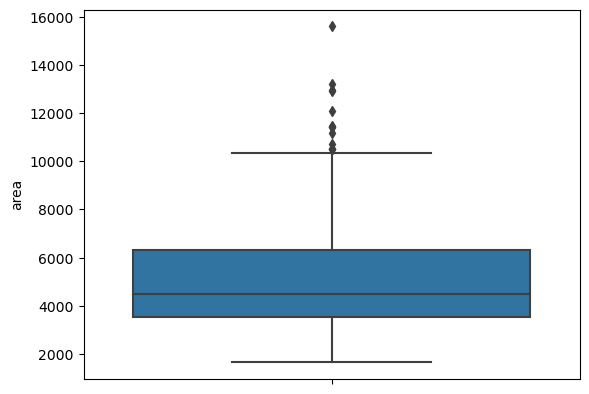

In [77]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y = df[i] )
        plt.show();

#### Outlier Treatment

In [78]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [80]:
df.columns

Index(['price', 'area'], dtype='object')

In [83]:
c=[ 'area']

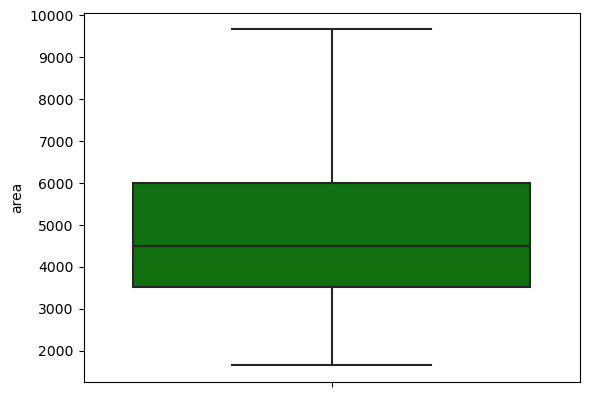

In [85]:
for i in c:
    UL,LL = outlier_limit(df[i])
    df[i] = np.where((df[i]>UL) | (df[i]<LL),np.nan,df[i])
    sns.boxplot( y=df[i],color='green')
    plt.show()

In [89]:
df.isnull().mean()*100

price    0.943396
area     3.396226
dtype: float64

In [90]:
df.dropna(inplace=True)
df

,price,area
20,8750000.0,4320.0
21,8680000.0,7155.0
22,8645000.0,8050.0
23,8645000.0,4560.0
24,8575000.0,8800.0
...,...,...
540,1820000.0,3000.0
541,1767150.0,2400.0
542,1750000.0,3620.0
543,1750000.0,2910.0


In [91]:
df.isnull().sum()

price    0
area     0
dtype: int64

In [18]:
data.shape

(530, 13)

In [92]:
df.head()

,price,area
20,8750000.0,4320.0
21,8680000.0,7155.0
22,8645000.0,8050.0
23,8645000.0,4560.0
24,8575000.0,8800.0


In [93]:
x= data[[ 'area']].values

In [94]:
y = data[['price']].values

In [95]:
sc = StandardScaler()

In [96]:
x = sc.fit_transform(x)

#### Model Building

In [97]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}    

In [104]:
for i in range(100):
    for name, model in models.items():
        model.fit(x_train,y_train)
        training=model.score(x_train,y_train)
        testing=model.score(x_test,y_test)
    if training>80 and testing>80:
        print(name)
        print('training : ',training*100)
        print('testing : ',testing*100)

In [98]:
for name, model in models.items():
        scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
        print("cross validation model : {}".format(name))
        rmse = np.sqrt(-scores)
        rmse_average = np.mean(rmse)
        print("AVERAGE RMSE: ",rmse_average)
        print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1370172.175861458
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1369818.5050881472
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  4606687.114853722
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1674213.5078033428
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1383159.2936931124
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1373931.929820132
*********************************************

In [63]:
model = Ridge()

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=56, shuffle=True)

In [65]:
model.fit(x_train, y_train)

Ridge()

In [66]:
y_pred = model.predict(x_test)

In [67]:
r2_score(y_test, y_pred)

0.5856389064779537

In [71]:
model.score(x_test, y_test)

0.5856389064779537

In [72]:
model.score(x_train, y_train)

0.5491953609102067

In [68]:
OUTPUT = pd.DataFrame(zip(y_test, y_pred), columns=['ACTUAL', 'PREDICTION'],dtype=float)

In [69]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,8960000.0,7.869903e+06
1,4473000.0,3.674410e+06
2,3080000.0,4.690632e+06
3,6160000.0,5.680900e+06
4,4613000.0,4.816507e+06


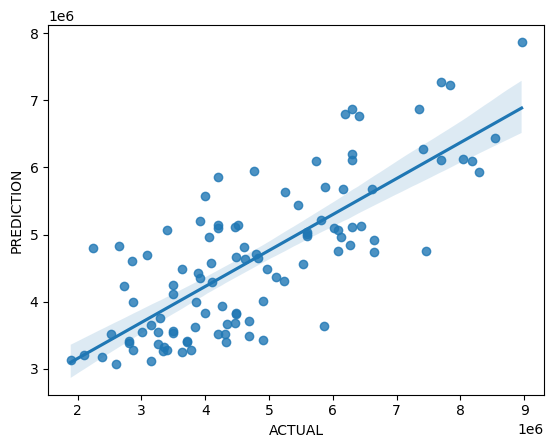

In [70]:
sns.regplot(data=OUTPUT, x='ACTUAL', y='PREDICTION')
plt.show()